In [1]:
options(repr.plot.width = 7, repr.plot.height = 6)
options(jupyter.plot_mimetypes = c('application/pdf', 'image/png'))

Gaussian kernel width `sigma`
=============================

The other important parameter for `DiffusionMap` is the Gaussian kernel width `sigma` ($\sigma$) that determines the transition probability between data points. The default call of **destiny** – `DiffusionMap(data)` aka `DiffusionMap(data, 'local')`) – uses a local `sigma` per cell, derived from a local density estimate around each cell.

Using the 1.0 default, `sigma = 'global'`, estimates sigma using a heuristic. It is also possible to specify this parameter manually to tweak the result. The eigenvector plot explained above will show a continuous decline instead of sharp drops if either the dataset is too big or the `sigma` is chosen too small.

The sigma estimation algorithm is explained in detail in <cite data-cite=haghverdi_diffusion_2015>Haghverdi et al. (2015)</cite>. In brief, it works by finding a maximum in the slope of the log-log plot of local density versus `sigma`.

In [2]:
library(destiny)
data(guo_norm)

Using find_sigmas
-----------------

An efficient variant of that procedure is provided by `find_sigmas`. This function determines the optimal sigma for a subset of the given data and provides the default sigma for a `DiffusionMap` call. Due to a different starting point, the resulting sigma is different from above:

In [3]:
sigmas <- find_sigmas(guo_norm, verbose = FALSE)
optimal_sigma(sigmas)

[1] 10.8946

The resulting diffusion map’s approximation depends on the chosen sigma. Note that the sigma estimation heuristic only finds local optima and even the global optimum of the heuristic might not be ideal for your data.

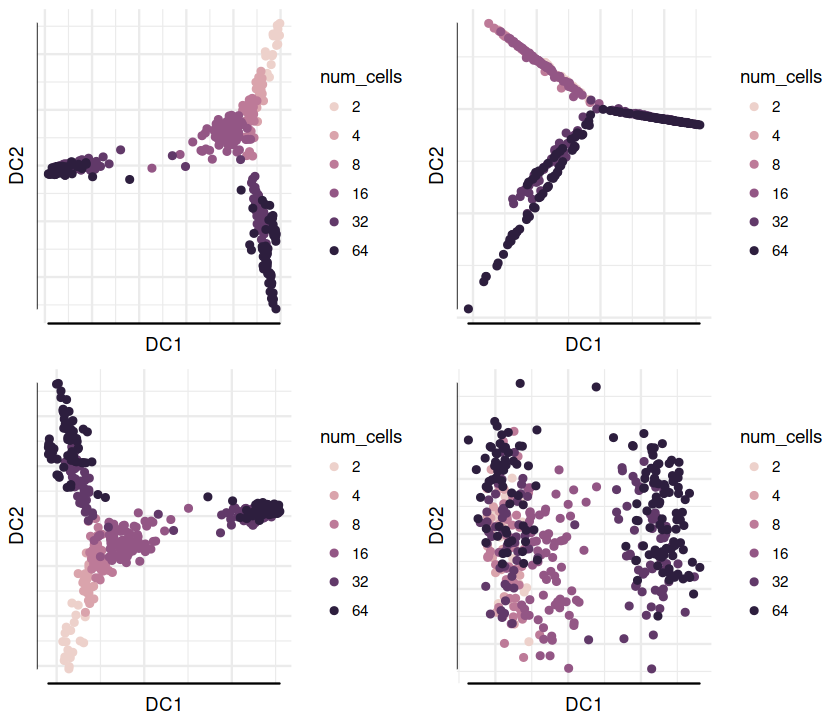

In [4]:
palette(cube_helix(6))

plots <- lapply(
    list('local', 5, round(optimal_sigma(sigmas), 2), 100),
    function(sigma) plot(
        DiffusionMap(guo_norm, sigma), 1:2,
        main = paste('σ =', sigma),
        col_by = 'num_cells', draw_legend = FALSE))

do.call(gridExtra::grid.arrange, c(plots, ncol = 2))